In [1]:
#declare dependencies
import pandas as pd
import numpy as np
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [3]:
#read in csv
wine_cat = pd.read_csv("wine_categories.csv")

In [4]:
wine_cat = wine_cat.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
#describe the dataframe, and the top scoring per categories
wine_cat.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,117834,27,US,52328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,117834,108814,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,83717,34076,Reserve,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,117834,NaN,NaN,NaN,88.4878,3.06543,80,86,88,91,100
price,109662,NaN,NaN,NaN,36.1379,42.1123,4,17,26,45,3300
province,117834,351,California,34948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,99573,1133,Napa Valley,4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,48613,17,Central Coast,10542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,93575,19,Roger Voss,23363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,117834,107749,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#inspect the data
print("Number of rows and columns:", wine_cat.shape)

Number of rows and columns: (117834, 18)


In [7]:
#display metadata
wine_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117834 entries, 0 to 117833
Data columns (total 18 columns):
country        117834 non-null object
description    117834 non-null object
designation    83717 non-null object
points         117834 non-null int64
price          109662 non-null float64
province       117834 non-null object
region_1       99573 non-null object
region_2       48613 non-null object
taster_name    93575 non-null object
title          117834 non-null object
variety        117834 non-null object
winery         117834 non-null object
freq           117834 non-null float64
c_freq         117834 non-null float64
red            117834 non-null float64
rose           117834 non-null float64
white          117834 non-null float64
sparkling      117834 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 16.2+ MB


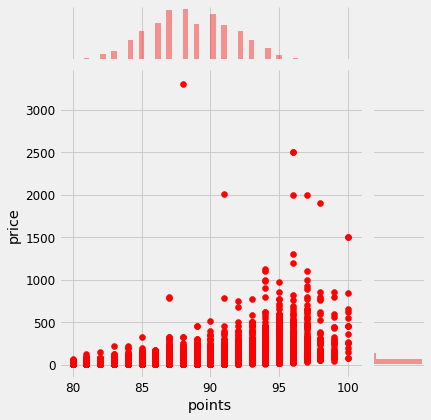

In [8]:
#Is there a relationship between points and price?
sns.jointplot(x=wine_cat['points'], y=wine_cat['price'], color ='r');

In [9]:
reds = ['Portuguese Red', 'Pinot Noir', 'Cabernet Sauvignon', \
          'Malbec', 'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',\
          'Nero d\'Avola', 'Gamay', 'Primitivo', 'Petit Verdot', 'Sangiovese', 'Cabernet Franc',\
          'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah', 'Touriga Nacional',\
          'Carmenère', 'Zinfandel', 'Syrah', 'Nebbiolo', 'Barbera', 'Rhône-style Red Blend',\
          'Sauvignon','Sangiovese Grosso', 'Shiraz', 'Montepulciano', 'Grenache',\
          'Tempranillo', 'Corvina, Rondinella, Molinara', 'Port', 'Garnacha', 'Mourvèdre']
whites = ['White Blend', 'Pinot Gris', 'Riesling', 'Gewürztraminer', 'Chardonnay',\
           'Chenin Blanc', 'Sauvignon Blanc', 'Bordeaux-style White Blend', \
           'Albariño', 'Grüner Veltliner', 'Viognier', 'Vermentino', 'Pinot Blanc',\
           'Portuguese White', 'Torrontés', 'Verdejo', 'Moscato', 'Blaufränkisch',\
           'Garganega', 'Pinot Grigio', 'Zweigelt', 'Rhône-style White Blend', 'Glera']
roses = ['Rosé']
sparklings = ['Champagne Blend', 'Prosecco', 'Sparkling Blend']

In [10]:
for index, row in wine_cat.iterrows():
    if row.variety in reds:
        wine_cat.loc[index, 'red'] = 1
    else: wine_cat.loc[index, 'red'] = 0

In [11]:
for index, row in wine_cat.iterrows():
    if row.variety in roses:
        wine_cat.loc[index, 'rose'] = 1
    else: wine_cat.loc[index, 'rose'] = 0
    if row.variety in whites:
        wine_cat.loc[index, 'white'] = 1
    else: wine_cat.loc[index, 'white'] = 0
    if row.variety in sparklings:
        wine_cat.loc[index, 'sparkling'] = 1
    else: wine_cat.loc[index, 'sparkling'] = 0

In [ ]:
#Plot by price and points for comparison
counts = wine_cat.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(16,8))
sns.pointplot(x = counts['price'], y = counts.index, color='b', orient='h', markers='o')
plt.title('Avg. Price by Country')
plt.xlabel('Price')
plt.ylabel('Country');

In [ ]:
counts = wine_cat.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(16,8))
sns.pointplot(x = counts['points'], y = counts.index, color='g', orient='h', markers='o')
plt.title('Avg. Points by Country')
plt.xlabel('Points')
plt.ylabel('Country');

In [ ]:
#Is there a relationship between points and price?
sns.jointplot(x=wine_cat['points'], y=wine_cat['price'], color ='r');

In [ ]:
#analyze the descriptions of the wines in wordcloud

plt.figure(figsize=(16,8))
plt.title('Wine Descriptions in a Word Cloud')
#define word cloud param
stopwords = STOPWORDS
stopwords.add("drink")
wc = WordCloud(max_words=800, max_font_size=40, stopwords = STOPWORDS, colormap = 'Set1')
wc.generate(' '.join(wine_cat['description']))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [ ]:
wc.to_file("img/wine_wc.png")

In [ ]:
#read in csv
clean_wine = pd.read_csv("clean_wine.csv")

In [ ]:
#describe the dataframe, and the top scoring per categories
clean_wine.describe(include='all',).T

In [ ]:
# read in the mask image 
#https://cmkt-image-prd.global.ssl.fastly.net/0.1.0/ps/1212553/1097/751/m1/fpnw/wm0/wine-bottle-and-glasses.-.jpg?1461672004&s=f7011a3fb1b6838cb5f02157b6020135

bottle_mask = np.array(Image.open(path.join("bottle.png")))
stopwords = STOPWORDS
stopwords.add("drink")

wc = WordCloud(background_color="white", max_words=1000, mask=bottle_mask, max_font_size=30, stopwords= STOPWORDS, colormap = 'Set1')
wc.generate(' '.join(wine_cat['description']))
plt.figure(figsize=(64,32))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [ ]:
wc.to_file("img/bottle_glass_wc.png")